In [13]:
import pandas as pd
import numpy as np


In [15]:
df0=pd.read_csv("linearX.csv",header=None)
df2=pd.read_csv("linearY.csv",header=None)

In [17]:
df0.shape

(100, 1)

In [19]:
df2.shape

(100, 1)

In [25]:
df0.head()

,9.1
0,8.0
1,9.1
2,8.4
3,6.9
4,7.7


In [ ]:
df0.tail()

In [71]:
x_normal=(df0-df0.mean())/df0.std()
x_normal.head()

,0
0,0.599375
1,-0.035801
2,0.599375
3,0.195172
4,-0.670976


In [73]:
df=pd.concat([x_normal,df2],axis=1)
df.columns=["X","Y"]


In [99]:
df.shape

(100, 2)

In [101]:
df.head()

,X,Y
0,0.599375,0.99523
1,-0.035801,0.99007
2,0.599375,0.99769
3,0.195172,0.99386
4,-0.670976,0.99508


In [81]:
x=df.iloc[:,0]
y=df.iloc[:,-1]

In [103]:
print(x)

0     0.599375
1    -0.035801
2     0.599375
3     0.195172
4    -0.670976
        ...   
95   -0.151287
96    1.234550
97   -1.132922
98   -0.440003
99   -0.440003
Name: X, Length: 100, dtype: float64


In [105]:
print(y)

0     0.99523
1     0.99007
2     0.99769
3     0.99386
4     0.99508
       ...   
95    0.99620
96    0.99760
97    0.99464
98    0.99830
99    0.99670
Name: Y, Length: 100, dtype: float64


In [117]:
class SLR:
    def __init__(self, LearnRate = 0.5, epoch = 1000):
        self.LearnRate = LearnRate
        self.epoch = epoch
        self.slope = 0
        self.intercept = 0
        self.costArr = []

    def fit(self, x, y):
        n = len(x)
        for _ in range(self.epoch):
            Y_pred = self.slope * x + self.intercept

            d_slope = (-2 / n) * np.sum(x * (y - Y_pred))
            d_intercept = (-2 / n) * np.sum(y - Y_pred)

            self.slope -= self.LearnRate * d_slope
            self.intercept -= self.LearnRate * d_intercept

            # cal. ing cost 
            # cost function cal
            cost = (1 / (2 * n)) * np.sum((y - Y_pred) ** 2)
            self.costArr.append(cost)

    def pre(self, x):
        return self.slope * x + self.intercept

    def eval(self, x, y):
        predictions = self.pre(x)
        mse = (1 / (2 * len(y))) * np.sum((y - predictions) ** 2)
        return mse

In [119]:
reg=SLR(LearnRate=0.5,epoch=60)
reg.fit(x,y)
pre=reg.pre(x)
msq=reg.eval(x,y)

In [87]:
print("Slope:- ", reg.slope)
print("Intercept:- ", reg.intercept)
print("Mean Square Error:- ", msq)

Slope:-  0.0013469476784633712
Intercept:-  0.9966201
Mean Square Error:-  1.19478981098366e-06


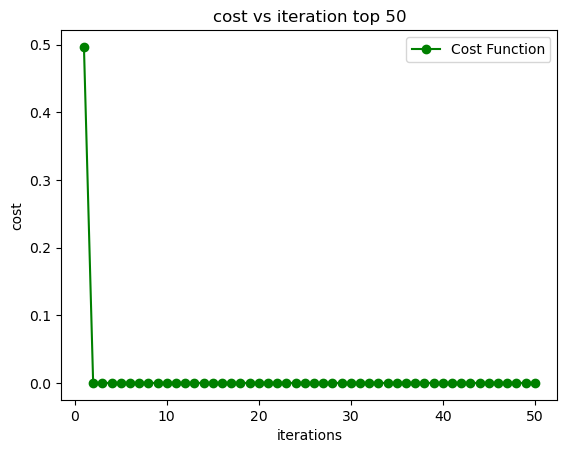

In [121]:
#Q3>
import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
plt.plot(range(1, 51), reg.costArr[:50], color = 'green', marker = 'o', label = 'Cost Function')
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost vs iteration top 50")
plt.legend()
plt.show()

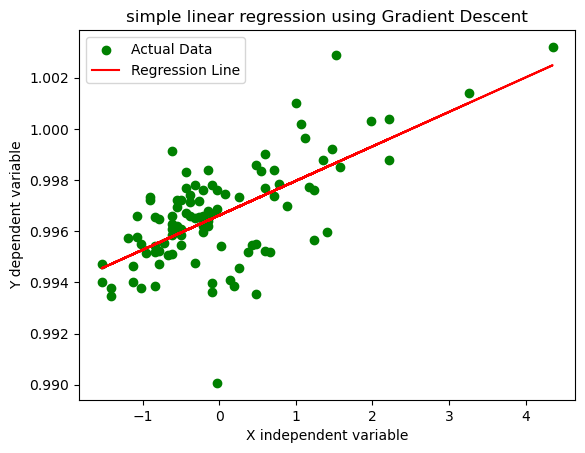

In [89]:
plt.scatter(x,y,color='green',label='Actual Data')
plt.plot(x, pre, color='red', label='Regression Line')
plt.xlabel('X independent variable')
plt.ylabel('Y dependent variable')
plt.legend()
plt.title('simple linear regression using Gradient Descent')
plt.show()

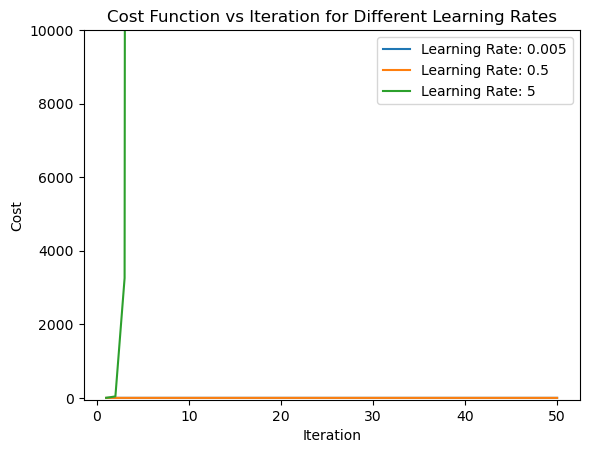

In [91]:
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    reg = SLR(LearnRate=lr, epoch=50)
    reg.fit(x,y)
    plt.plot(range(1, 51), reg.costArr, label=f'Learning Rate: {lr}')
plt.xlabel('Iteration')
plt.ylim(-50, 10000)
plt.ylabel('Cost')
plt.title('Cost Function vs Iteration for Different Learning Rates')
plt.legend()
plt.show()

In [63]:
class SGDLR:
    def __init__(self, LearnRate=0.01, epoch=60):
        self.LearnRate = LearnRate
        self.epoch = epoch
        self.slope = 0
        self.intercept = 0
        self.costArr = []

    def fit(self, x, y):
        n = len(x)
        for epoch in range(self.epoch):
            for i in range(n):
                xi = x[i]
                yi = y[i]
                
                yi_pred = self.slope * xi + self.intercept

                d_slope = -2 * xi * (yi - yi_pred)
                d_intercept = -2 * (yi - yi_pred)

                self.slope -= self.LearnRate * d_slope
                self.intercept -= self.LearnRate * d_intercept

            #cost
            Y_pred = self.slope * x+ self.intercept
            cost = np.mean((y - Y_pred) ** 2)
            self.costArr.append(cost)


sgd_reg = SGDLR(LearnRate=0.01, epoch=60)
sgd_reg.fit(x,y)

In [67]:
#q6
class MBGDLR:
    def __init__(self, LearnRate=0.01, epoch=60, batch_size=10):
        self.LearnRate = LearnRate
        self.epoch = epoch
        self.batch_size = batch_size
        self.slope = 0
        self.intercept = 0
        self.costArr = []

    def fit(self,x,y):
        n = len(x)
        for epoch in range(self.epoch):
            indices = np.random.permutation(n)
            X_shuffle = x[indices]
            Y_shuffle = y[indices]
            for i in range(0, n, self.batch_size):
                X_batch = X_shuffle[i:i + self.batch_size]
                Y_batch = Y_shuffle[i:i + self.batch_size]

                Y_pred = self.slope * X_batch + self.intercept

                d_slope = (-2 / len(X_batch)) * np.sum(X_batch * (Y_batch - Y_pred))
                d_intercept = (-2 / len(X_batch)) * np.sum(Y_batch - Y_pred)

                # updation
                self.slope -= self.LearnRate * d_slope
                self.intercept -= self.LearnRate * d_intercept

            # cost
            Y_pred = self.slope * x + self.intercept
            cost = np.mean((y - Y_pred) ** 2)
            self.costArr.append(cost)


mbgd_reg = MBGDLR(LearnRate=0.01, epoch=60, batch_size=10)
mbgd_reg.fit(x,y)

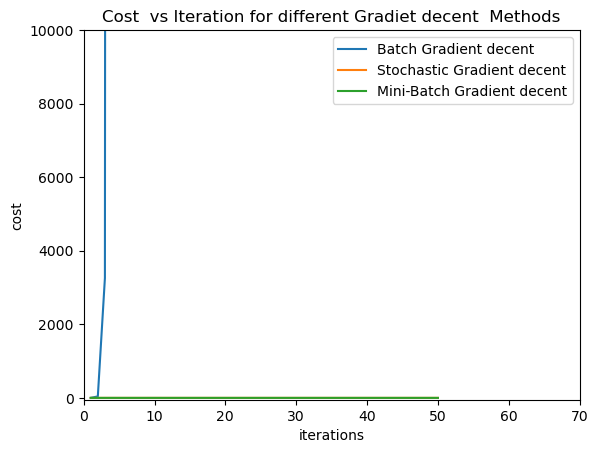

In [93]:
plt.plot(range(1, 51), reg.costArr[:50], label='Batch Gradient decent')
plt.plot(range(1, 51), sgd_reg.costArr[:50], label='Stochastic Gradient decent')
plt.plot(range(1, 51), mbgd_reg.costArr[:50], label='Mini-Batch Gradient decent')

plt.xlim(0, 70)
plt.xlabel('iterations')

plt.ylim(-50, 10000)
plt.ylabel('cost')
plt.title('Cost  vs Iteration for different Gradiet decent  Methods')
plt.legend()
plt.show()